In [27]:
import pandas as pd 
import json
import matplotlib.pyplot as plt 


# 读取数据
with open("../xfdata/dataset/job_list.json", "r", encoding="utf-8") as f:
    job_list = json.load(f)
with open("../xfdata/dataset/train.json", "r", encoding="utf-8") as f:
    train = json.load(f)
with open("../xfdata/dataset/test.json", "r", encoding="utf-8") as f:
    test = json.load(f)

def hist(x):
    plt.hist(pd.Series(x).map(len))
    plt.show()

# 一、工作数据

In [28]:
job_sentences = []
for line in job_list:
    positionName = line["positionName"]
    positionDescription = line["positionDescription"]
    positionRequirements = line["positionRequirements"]
    positionID = line["positionID"]
    sentence = ["<positionName>"] + positionName.split() + ["<positionDescription>"] + positionDescription.split() + ["<positionRequirements>"] + positionRequirements.split()
    job_sentences.append(sentence)

# 保存数据
with open("../user_data/job_sentences.json", "w", encoding="utf-8") as f:
    json.dump(job_sentences, f, indent=4)

# 二、简历数据

In [29]:
resume_data = []
for line in train:
    resume_data.append(line["resumeData"])
for line in test:
    resume_data.append(line["resumeData"])

## 1、profileEduExps（教育背景）

In [92]:
def get_profileEduExps_sentence(profileEduExps_):
    """  
    根据学习阶段生成句子（如本科、研究生等）
    """
    profileEduExps_sentence = ["<begin_EduExp>", "<education>", profileEduExps_["education"].replace(" ", "&")] \
+ ["<schoolLevel>", " ".join(profileEduExps_["schoolLevel"]).replace(" ", "&")] \
+ ["<department>"] + profileEduExps_["department"].split() + ["<major>"] + profileEduExps_["major"].split() \
+ ["<courses>"] + profileEduExps_["courses"].split() + ["<school>"] + profileEduExps_["school"].split()  \
+ ["<GPA>"] + profileEduExps_["GPA"].split() + ["<ranking>"] + profileEduExps_["ranking"].split() \
+ ["<duration>"] + profileEduExps_["duration"].split() + ["<end_EduExp>"]
    return profileEduExps_sentence


profileEduExps_sentences = []
for line in resume_data:
    sentence = ["<begin_EduExps>"]
    profileEduExps = line["profileEduExps"]
    for profileEduExps_ in profileEduExps:
        sentence.extend(get_profileEduExps_sentence(profileEduExps_))
    sentence.append("<end_EduExps>")
    profileEduExps_sentences.append(sentence)

# 保存数据
with open("../user_data/profileEduExps_sentences.json", "w", encoding="utf-8") as f:
    json.dump(profileEduExps_sentences, f, indent=4)

## 2、profileSocialExps（社会经历）

In [102]:
def get_profileSocialExps_sentence(profileSocialExps_):
    """
    根据一段社会经历生成句子
    """
    profileSocialExps_sentence = ["<begin_socialExp>"] + ["<jobTitle>"] + profileSocialExps_["jobTitle"].split() \
+ ["<jobDescr>"] + profileSocialExps_["jobDescr"].split() + ["organization"] + profileSocialExps_["organization"].split() \
+ ["department"] + profileSocialExps_["department"].split() + ["location"] + profileSocialExps_["location"].split() \
+ ["<duration>"] + profileSocialExps_["duration"].split() + ["<end_socialExp>"]
    return profileSocialExps_sentence

profileSocialExps_sentences = []
for line in resume_data:
    sentence = ["<begin_SocialExps>"]
    profileSocialExps = line["profileSocialExps"]
    for profileSocialExps_ in profileSocialExps:
        sentence.extend(get_profileSocialExps_sentence(profileSocialExps_))
    sentence.append("<end_SocialExps>")
    profileSocialExps_sentences.append(sentence)

# 保存数据
with open("../user_data/profileSocialExps_sentences.json", "w", encoding="utf-8") as f:
    json.dump(profileSocialExps_sentences, f, indent=4)

## 3、profileProjectExps（项目经历）

In [104]:
def get_profileProjectExps_sentence(profileProjectExps_):
    """
    根据一段项目经历生成句子
    """
    profileProjectExps_sentence = ["<begin_projectExp>"] \
+ ["<jobTitle>"] + profileProjectExps_["jobTitle"].split() \
+ ["<projectDesc>"] + profileProjectExps_["projectDesc"].split() \
+ ["<companyName>"] + profileProjectExps_["companyName"].split() + ["<projectName>"] + profileProjectExps_["projectName"].split() \
+ ["<location>"] + profileProjectExps_["location"].split() \
+ ["<duration>"] + profileProjectExps_["duration"].split() + ["<end_projectExp>"]
    return profileProjectExps_sentence

profileProjectExps_sentences = []
for line in resume_data:
    sentence = ["<begin_ProjectExps>"]
    profileProjectExps = line["profileProjectExps"]
    for profileProjectExps_ in profileProjectExps:
        sentence.extend(get_profileProjectExps_sentence(profileProjectExps_))
    sentence.append("<end_ProjectExps>")
    profileProjectExps_sentences.append(sentence)

# 保存数据
with open("../user_data/profileProjectExps_sentences.json", "w", encoding="utf-8") as f:
    json.dump(profileProjectExps_sentences, f, indent=4)

## 4、profileWorkExps（工作经历）

In [109]:
def get_profileWorkExps_sentence(profileWorkExps_):
    """ 
    根据一段工作经历生成句子
    """
    profileWorkExps_sentence = ["<begin_workExp>"] \
+ ["<jobTitle>"] + profileWorkExps_["jobTitle"].split() \
+ ["<jobDescr>"] + profileWorkExps_["jobDescr"].split() \
+ ["<department>"] + profileWorkExps_["department"].split() \
+ ["<enterpriseName>"] + profileWorkExps_["enterpriseName"].split() \
+ ["<enterpriseNature>"] + profileWorkExps_["enterpriseNature"].split() \
+ ["<enterpriseScale>"] + profileWorkExps_["enterpriseScale"].split() \
+ ["<industry>"] + (" ".join(profileWorkExps_["industry"])).split() \
+ ["<underlingNum>"] + profileWorkExps_["underlingNum"].split() \
+ ["<salary>"] + profileWorkExps_["salary"].split() \
+ ["<duration>"] + profileWorkExps_["duration"].split() \
+ ["<end_workExp>"]
    return profileWorkExps_sentence

profileWorkExps_sentences = []
for line in resume_data:
    sentence = ["<begin_WorkExps>"]
    profileWorkExps = line["profileWorkExps"]
    for profileWorkExps_ in profileWorkExps:
        sentence.extend(get_profileWorkExps_sentence(profileWorkExps_))
    sentence.append("<end_WorkExps>")
    profileWorkExps_sentences.append(sentence)

# 保存数据
with open("../user_data/profileWorkExps_sentences.json", "w", encoding="utf-8") as f:
    json.dump(profileWorkExps_sentences, f, indent=4)

## 5、profileSkills（技能）

In [112]:
def get_profileSkills_sentence(profileSkills):
    """  
    将技能转化为句子
    """
    professionalSkills_sentence = ["<begin_professionalSkills>"]
    for professionalSkill in profileSkills["professionalSkills"]:
        professionalSkills_sentence.extend(["<begin_skill>"] + professionalSkill["skill"].split())
    professionalSkills_sentence.append("<end_professionalSkills>")

    softSkills_sentence = ["<begin_softSkills>"]
    for softSkill in profileSkills["softSkillsOriginal"]:
        softSkills_sentence.extend(["<begin_skill>"] + softSkill.split())
    softSkills_sentence.append("<end_softSkills>")

    return professionalSkills_sentence + softSkills_sentence

profileSkills_sentences = []
for line in resume_data:
    sentence = []
    profileSkills = line["profileSkills"]
    sentence.extend(get_profileSkills_sentence(profileSkills))
    profileSkills_sentences.append(sentence)

# 保存数据
with open("../user_data/profileSkills_sentences.json", "w", encoding="utf-8") as f:
    json.dump(profileSkills_sentences, f, indent=4)

## 6、profileAwards（荣誉）

In [115]:
def get_profileAwards_sentence(profileAwards):
    """
    将荣誉转化为句子
    """
    profileAwards_sentence = ["<begin_awards>"]
    # contests
    profileAwards_sentence.append("<begin_contests>")
    for contest in profileAwards["contests"]:
        profileAwards_sentence.extend(["<level>"] + contest["level"].split()
+ ["<name>"] + contest["name"].split())
    profileAwards_sentence.append("<end_contests>")
    
    # scholarship
    profileAwards_sentence.append("<begin_scholarship>")
    for sholarship in profileAwards["scholarship"]:
        profileAwards_sentence.extend(["<level>"] + sholarship["level"].split()  
+ ["<name>"] + sholarship["name"].split())
    profileAwards_sentence.append("<end_scholarship>")
    
    # certificates
    profileAwards_sentence.append("<begin_certificates>")
    for certificate in profileAwards["certificates"]:
        profileAwards_sentence.extend(["certifcate"] + certificate.split())
    profileAwards_sentence.append("<end_certificates>")
    # awards
    profileAwards_sentence.append("<begin_awards>")
    for award in profileAwards["awards"]:
        profileAwards_sentence.extend(["award"] + award.split())
    profileAwards_sentence.append("<end_awards>")
    return profileAwards_sentence

profileAwards_sentences = []
for line in resume_data:
    sentence = []
    profileAwards = line["profileAwards"]
    sentence.extend(get_profileAwards_sentence(profileAwards))
    profileAwards_sentences.append(sentence)

# 保存数据
with open("../user_data/profileAwards_sentences.json", "w", encoding="utf-8") as f:
    json.dump(profileAwards_sentences, f, indent=4)

## 7、profileDesire（求职意愿）

In [118]:
def get_profileDesire_sentence(profileDesire):
    """
    根据求职意愿生成句子
    """
    profileDesire_sentence = ["<begin_desire>"] + ["<function>"] + (" ".join(profileDesire["expectFunction"])).split() \
+ ["<industry>"] + (" ".join(profileDesire["expectIndustry"])).split() \
+ ["<place>"] + (" ".join(profileDesire["expectPlace"])).split() \
+ ["<salary>"] + profileDesire["expectSalary"].split() + ["<end_place>"] + ["<end_desire>"]
    return profileDesire_sentence

profileDesire_sentences = []
for line in resume_data:
    sentence = []
    profileDesire = line["profileDesire"]
    sentence.extend(get_profileDesire_sentence(profileDesire))
    profileDesire_sentences.append(sentence)

# 保存数据
with open("../user_data/profileDesire_sentences.json", "w", encoding="utf-8") as f:
    json.dump(profileDesire_sentences, f, indent=4)

# 8、profileLanguage（语言）

In [121]:
def get_profileLanguage_sentence(profileLanguage):
    """
    根据语言生成句子
    """
    profileLanguage_sentence = ["<begin_Language>"]
    # language
    profileLanguage_sentence.append("<begin_languages>")
    for language in profileLanguage["languages"]:
        profileLanguage_sentence.extend(["<language>"] + language["language"].split() \
+ ["<proficiency>"] + (" ".join(language["proficiency"])).split())
    # englishLevel
    profileLanguage_sentence.append("<begin_englishLevel>")
    for englishLevel in profileLanguage["englishLevel"]:
        profileLanguage_sentence.extend(["<program>"] + englishLevel["program"].split() \
+ ["<score>"] + englishLevel["score"].split())
    profileLanguage_sentence.append("<end_englishLevel>")
    return profileLanguage_sentence

profileLanguage_sentences = []
for line in resume_data:
    sentence = []
    profileLanguage = line["profileLanguage"]
    sentence.extend(get_profileLanguage_sentence(profileLanguage))
    profileLanguage_sentences.append(sentence)

# 保存数据
with open("../user_data/profileLanguage_sentences.json", "w", encoding="utf-8") as f:
    json.dump(profileLanguage_sentences, f, indent=4)

# 三、合并与保存

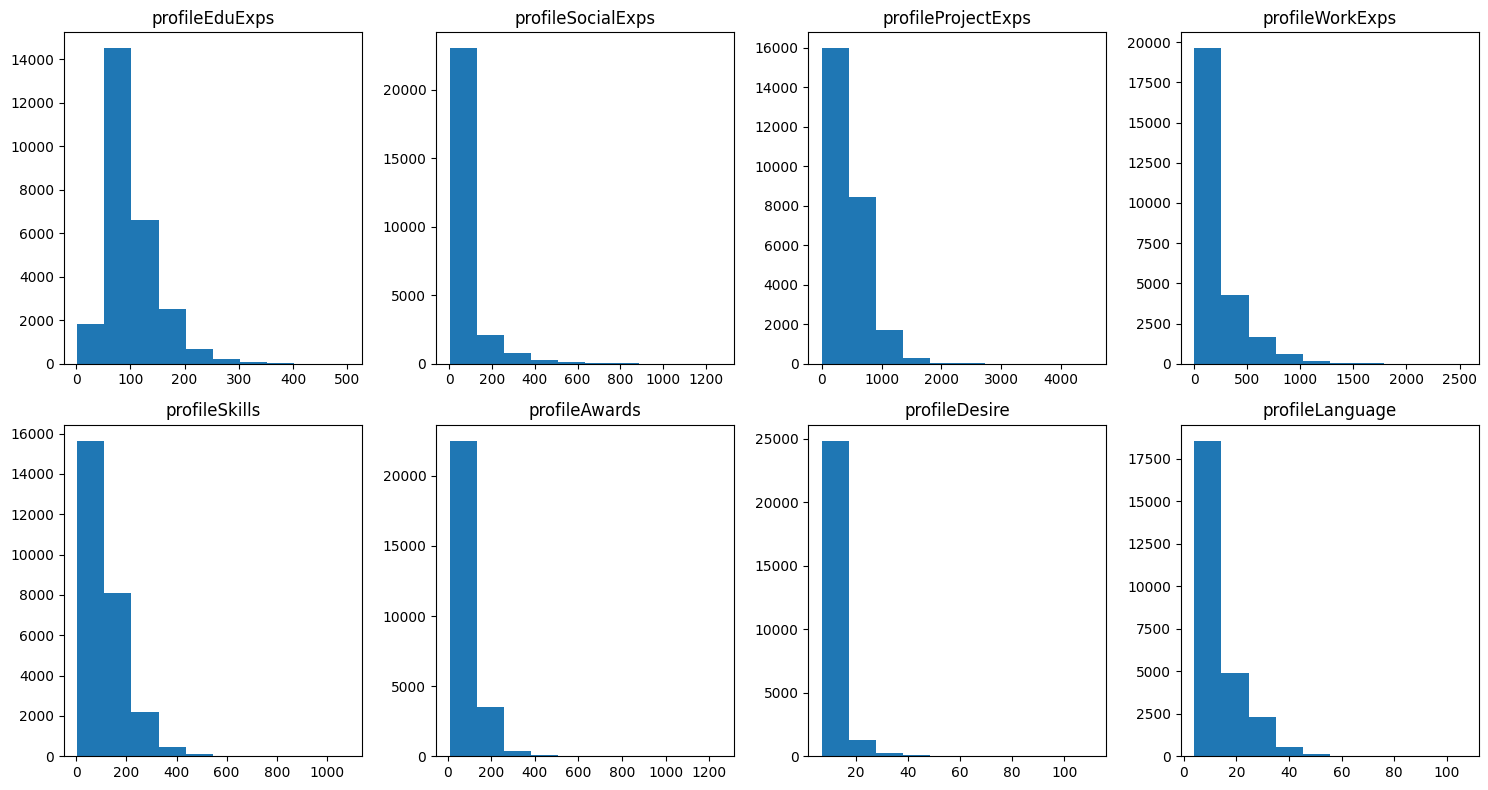

In [122]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
plt.subplot(2, 4, 1)
plt.hist([len(i) for i in profileEduExps_sentences])
plt.title("profileEduExps")
plt.subplot(2, 4, 2)
plt.hist([len(i) for i in profileSocialExps_sentences])
plt.title("profileSocialExps")
plt.subplot(2, 4, 3)
plt.hist([len(i) for i in profileProjectExps_sentences])
plt.title("profileProjectExps")
plt.subplot(2, 4, 4)
plt.hist([len(i) for i in profileWorkExps_sentences])
plt.title("profileWorkExps")
plt.subplot(2, 4, 5)
plt.hist([len(i) for i in profileSkills_sentences])
plt.title("profileSkills")
plt.subplot(2, 4, 6)
plt.hist([len(i) for i in profileAwards_sentences])
plt.title("profileAwards")
plt.subplot(2, 4, 7)
plt.hist([len(i) for i in profileDesire_sentences])
plt.title("profileDesire")
plt.subplot(2, 4, 8)
plt.hist([len(i) for i in profileLanguage_sentences])
plt.title("profileLanguage")
plt.tight_layout()
plt.show()

In [123]:
sentences = []
for s1, s2, s3, s4, s5, s6, s7, s8 in zip(profileEduExps_sentences, profileWorkExps_sentences, profileProjectExps_sentences, \
profileSocialExps_sentences, profileSkills_sentences, profileAwards_sentences, profileDesire_sentences, \
profileLanguage_sentences):
    sentences.append(s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8)

corpus = sentences + job_sentences
print(len(corpus))

with open("../user_data/corpus.json", "w", encoding="utf-8") as f:
    json.dump(corpus, f, indent=4)

26551


(array([4.5970e+03, 1.4317e+04, 6.2480e+03, 1.1430e+03, 1.9200e+02,
        4.4000e+01, 6.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  32. ,  572.9, 1113.8, 1654.7, 2195.6, 2736.5, 3277.4, 3818.3,
        4359.2, 4900.1, 5441. ]),
 <BarContainer object of 10 artists>)

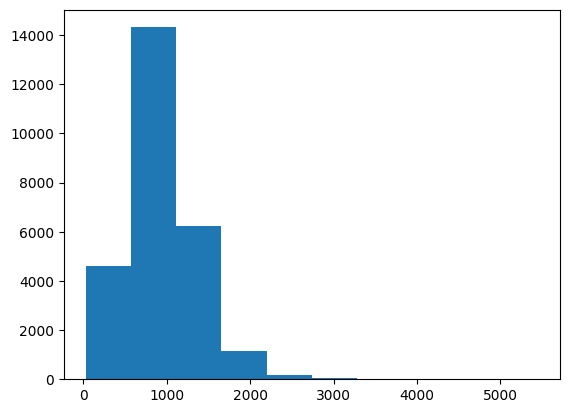

In [124]:
plt.hist(pd.Series(corpus).map(len))